In [1]:
%matplotlib inline
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
%load_ext line_profiler
import seaborn as sns
%load_ext autoreload
%autoreload 2
from peaks.lm import curve_fit

In [2]:
def test_func(xdata, a0, x0, sigma0, a1, x1, sigma1, o):
    """An exponential decay"""
    return a0 * np.exp(-(xdata-x0)**2 / sigma0**2) + a1 * np.exp(-(xdata-x1)**2 / sigma1**2) + o

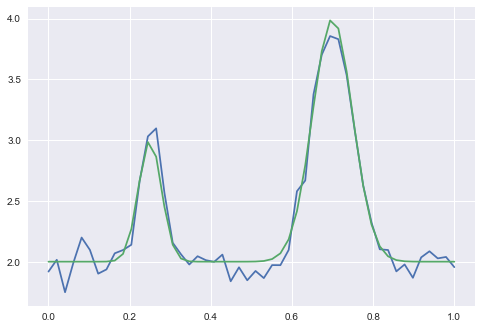

In [3]:
x = np.linspace(0,1)
preal = np.array([1, 0.25, .04, 2, 0.7, 0.07, 2])
y_real = test_func(x, *preal)
y = y_real + np.random.randn(len(y_real)) * 0.1
plt.plot(x, y, x, y_real)

In [4]:
def test_func_jac(xdata, a0, x0, sigma0, a1, x1, sigma1, o):
    """An exponential decay"""
    dyda0 = np.exp(-(xdata-x0)**2 / sigma0**2)
    dydx0 = 2 * a0 * (xdata-x0) * dyda0 / sigma0**2
    dydsigma0 = dydx0 * (xdata-x0) / sigma0
    
    dyda1 = np.exp(-(xdata-x1)**2 / sigma1**2)
    dydx1 = 2 * a1 * (xdata-x1) * dyda1 / sigma1**2
    dydsigma1 = dydx1 * (xdata-x1) / sigma1
    
    dydo = np.ones_like(dyda0)
    
    to_return = np.concatenate((dyda0, dydx0, dydsigma0, dyda1, dydx1, dydsigma1, dydo))
    to_return.shape = (7, -1)
#     to_return = np.vstack((dyda0, dydx0, dydsigma0, dyda1, dydx1, dydsigma1, dydo))
    return to_return.T

mle took 9
[  2.05975328e+02   2.51939447e-01   3.85140687e-02   5.14795685e+02
   6.99873970e-01   6.85681831e-02   4.59325254e+01]
2.2 ms ± 26.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
ls took 8
[  2.06792860e+02   2.51195051e-01   3.82186927e-02   5.12729503e+02
   6.99609203e-01   6.88998400e-02   4.59346598e+01]
1.74 ms ± 62.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
lm took 8
[  2.06792831e+02   2.51194874e-01   3.82187099e-02   5.12729471e+02
   6.99609194e-01   6.88998533e-02   4.59346474e+01]
979 µs ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


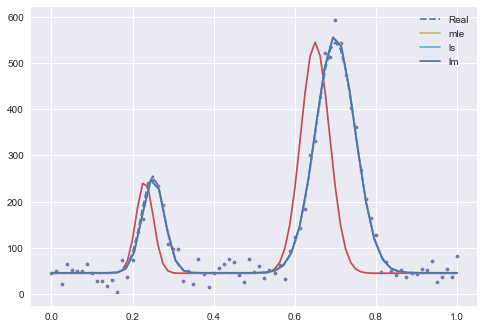

In [5]:
preal_ls = np.array([210, 0.25, .04, 500, 0.7, 0.07, 45])
pguess_ls = np.array([ 200  ,  0.23,  0.03,  500.  ,  0.65 ,  0.05 ,  45.  ])

x_ls = np.linspace(0,1, 81)
y_real_ls = test_func(x_ls, *preal_ls)

plt.plot(x_ls, y_real_ls, "--", label="Real")

y_ls = y_real_ls + np.random.randn(len(y_real_ls))*20

y_guess_ls = test_func(x_ls, *pguess_ls)
plt.plot(x_ls, y_ls, ".")
plt.plot(x_ls, y_guess_ls)

plt.plot(x_ls, y_ls, ".")
for meth in ("mle", "ls", "lm"):
    def opt():
        return curve_fit(
                    test_func, x_ls, y_ls, p0=pguess_ls, full_output=True,
                    jac=test_func_jac, method=meth, maxfev=10000)
    popt, pcov, infodict, errmsg, ier = opt()
    y_fit_ls = test_func(x, *popt)
    plt.plot(x, y_fit_ls, label=meth)
    print(meth, "took", infodict["nfev"])
    print(popt)
    %timeit opt()
plt.legend()

## Compare methods

mle took 12
[  1.47575204e+02   2.50119459e-01   3.94848449e-02   5.03762978e+02
   6.99177870e-01   6.93312129e-02   1.01614902e+02]
3.31 ms ± 5.56 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
ls took 14
[  1.47822931e+02   2.50490048e-01   3.94206091e-02   5.02898450e+02
   6.98992973e-01   6.95299517e-02   1.01543764e+02]
2.83 ms ± 36.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
lm took 8
[  1.47823202e+02   2.50490072e-01   3.94204423e-02   5.02898407e+02
   6.98992970e-01   6.95299521e-02   1.01543794e+02]
1.27 ms ± 4.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


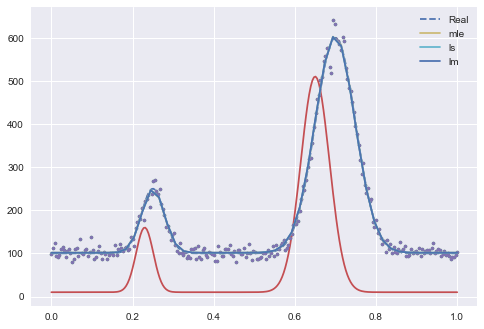

In [7]:
preal_mle = np.array([150, 0.25, .04, 500, 0.7, 0.07, 100])
pguess_mle = np.array([ 150  ,  0.23,  0.03,  500.  ,  0.65 ,  0.05 ,  10.  ])

x_mle = np.linspace(0,1, 256)
y_real_mle = test_func(x_mle, *preal_mle)

plt.plot(x_mle, y_real_mle, "--", label="Real")

y_mle = np.random.poisson(y_real_mle)

y_guess_mle = test_func(x_mle, *pguess_mle)
plt.plot(x_mle, y_mle, ".")
plt.plot(x_mle, y_guess_mle)

plt.plot(x_mle, y_mle, ".")
for meth in ("mle", "ls", "lm"):
    def opt():
        return curve_fit(
                    test_func, x_mle, y_mle, p0=pguess_mle, full_output=True,
                    jac=test_func_jac, method=meth, maxfev=10000)
    popt, pcov, infodict, errmsg, ier = opt()
    y_fit_mle = test_func(x, *popt)
    plt.plot(x, y_fit_mle, label=meth)
    print(meth, "took", infodict["nfev"])
    print(popt)
    %timeit opt()
plt.legend()